#Importando tempo

In [ ]:
import time

#Importando a tabela 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/Shared drives/trabalho aed/uol.csv")
dataframe.head()

,date,title,url,text
0,2020-01-21 00:00:00,medo de virus da china faz aeroportos verifica...,https://noticias.uol.com.br/internacional/ulti...,"['Caso não seja possível, a orientação é evita..."
1,2020-01-22 00:00:00,oms decide na quinta feira se coronavirus cons...,https://noticias.uol.com.br/ultimas-noticias/r...,['A declaração foi feita depois que a OMS real...
2,2020-01-22 00:00:00,medico que viajou para a china pode ser o 1 ca...,https://noticias.uol.com.br/ultimas-noticias/e...,"['Após sua chegada, ele começou a apresentar c..."
3,2020-01-22 00:00:00,saude diz que caso de bh nao se enquadra como ...,https://noticias.uol.com.br/ultimas-noticias/a...,"['De acordo com a definição atual da OMS, só h..."
4,2020-01-22 00:00:00,cidade chinesa de wuhan atingida por novo viru...,https://noticias.uol.com.br/ultimas-noticias/r...,"['(Reuters) - A cidade chinesa de Wuhan, fonte..."


#Importando biblioteca pra dividir as sentenças 

In [ ]:
import nltk
from nltk import tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Criando lista ligada

In [ ]:
class Elemento:
    def __init__(self, valor):
        self.valor = valor
        self.next = None
    def __str__(self):
        return str(self.valor)

class ListaLigada:
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def __iter__(self):
        element = self.head
        while element is not None:
            yield element
            element = element.next

    def add_first(self,element):
        newest = Elemento(element)
        newest.next = self.head
        self.head = newest
        self.size +=1

    def add_last(self,element):
        newest = Elemento(element)
        newest.next = None
        self.tail.next = newest
        self.tail = newest
        self.size +=1

#Classe Tabela Hash

In [ ]:
class TabelaHash2():
  def __init__(self):
    self.size = None
    self.lista = [None]

  def setTamanho(self, tamanho):
    self.size = tamanho
    self.lista = self.lista*self.size

  def getTamanho(self):
    return self.size

  def pegarLista(self):
    return self.lista

  def incluirItem(self, item, posicao):
    if(self.lista[posicao]==None):
      self.lista[posicao] = ListaLigada()
      self.lista[posicao].add_first([item])
    else:
      self.lista[posicao].add_first([item])
    
  def pegarItem(self, posicao):
    if (self.lista[posicao]==None):
      return None
    else:
      return self.lista[posicao]

    

#Palavra a ser pesquisada

In [ ]:
#@title Palavra a ser pesquisada
p1 = "Virus" #@param {type:"string"}


#Função de Hash 1:

-Tamanho1

In [ ]:
def hash(frase,tamanho):
  x = len(frase)
  return x%tamanho

In [ ]:
def MostrarTitulo(p1):
  tabelatitulo1 = TabelaHash2()
  tabelatitulo1.setTamanho(13159)

  inicio1 = time.time()
  #Inserindo os titulos na tabela hash
  titulo1= []
  print("Titulos com a palavra "+ p1+ ":")
  for i in dataframe["title"]:
    valor = str(i)
    titulo1.append(valor)

  for i in titulo1:
    t = i.split(" ")
    for j in t:
      tabelatitulo1.incluirItem(i,hash(j,tabelatitulo1.getTamanho()))
  
  #Procurando a palavra na tabela hash com os titulos
  inicio = time.time()
  titulos1 = tabelatitulo1.pegarItem(hash(p1.lower(), tabelatitulo1.getTamanho()))
  auxiliar = "b"
  while (titulos1.head.next is not None):
    if (p1.lower() in str(titulos1.head.valor).lower().split(" ")):
      if (str(titulos1.head.valor)!= auxiliar):
        print(titulos1.head.valor)
        auxiliar = str(titulos1.head.valor)
        titulos1.head = titulos1.head.next
      else:
        titulos1.head = titulos1.head.next
    else:
      titulos1.head = titulos1.head.next
  fim = time.time()
  return (fim-inicio)


In [ ]:
def MostrarSentenças(p1):
  tabelatexto1 = TabelaHash2()
  tabelatexto1.setTamanho(13159)

  texto1 = []
  #Comeco Da tabela de texto
  print("Formatando os textos, aguarde...")
  for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
    lista1 = []
    for j in nltk.tokenize.sent_tokenize(i):
      lista1.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
    texto1.append(lista1)
  print("Textos formatados!")
  print("Iniciando construcao da tabela hash, aguarde...")  
  
  for i in texto1:#Criando um enderecamento para as sentencas, usando as palavras
    for j in i:
      #Eliminando carcteres indesejaveis
      alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
      splitado = alcaparra.split()
      for w in splitado:
        #Encaixando as sentencas na tabela hash
        tabelatexto1.incluirItem(j,hash(w,tabelatexto1.getTamanho()))
  print("Tabela hash construida!")

  #Passando a posicao da tabela hash para uma variavel
  inicio=time.time()
  frases1 = tabelatexto1.pegarItem(hash(p1, tabelatexto1.getTamanho()))
  auxiliar = "c"#string de comparacao
  print("Sentencas com a palavra "+ p1+ ":")
  while (frases1.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
    if (p1.lower() in str(frases1.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
      if (str(frases1.head.valor)!= auxiliar):
        print(frases1.head.valor)#retornando a sentenca
        auxiliar = str(frases1.head.valor)
        frases1.head = frases1.head.next
      
      else:
        frases1.head = frases1.head.next
    else:
      frases1.head = frases1.head.next
  fim=time.time()
  return (fim-inicio)

Mostrando os titulos e sentenças

In [ ]:
inicio = time.time()
titulobusca11 = MostrarTitulo(p1)
sentencabusca11 = MostrarSentenças(p1)
fim = time.time()
tempo11 = fim - inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem destruir virus mas efeito nao e imediato']
['a origem divina do virus a pandemia pelos olhos de duas evangelicas']
['oms sem acao

-Tamanho2

In [ ]:
def MostrarTitulo1(p1):
  tabelatitulo1 = TabelaHash2()
  tabelatitulo1.setTamanho(13163)

  inicio1 = time.time()
  #Inserindo os titulos na tabela hash
  titulo1= []
  print("Titulos com a palavra "+ p1+ ":")
  for i in dataframe["title"]:
    valor = str(i)
    titulo1.append(valor)

  for i in titulo1:
    t = i.split(" ")
    for j in t:
      tabelatitulo1.incluirItem(i,hash(j,tabelatitulo1.getTamanho()))

  #Procurando a palavra na tabela hash com os titulos
  inicio = time.time()
  titulos1 = tabelatitulo1.pegarItem(hash(p1.lower(), tabelatitulo1.getTamanho()))
  auxiliar = "b"
  while (titulos1.head.next is not None):
    if (p1.lower() in str(titulos1.head.valor).lower().split(" ")):
      if (str(titulos1.head.valor)!= auxiliar):
        print(titulos1.head.valor)
        auxiliar = str(titulos1.head.valor)
        titulos1.head = titulos1.head.next
      else:
        titulos1.head = titulos1.head.next
    else:
      titulos1.head = titulos1.head.next
  fim = time.time()
  return (fim-inicio)

In [ ]:
def MostrarSentenças1(p1):
  tabelatexto1 = TabelaHash2()
  tabelatexto1.setTamanho(13163)

  texto1 = []
  #Comeco Da tabela de texto
  print("Formatando os textos, aguarde...")
  for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
    lista1 = []
    for j in nltk.tokenize.sent_tokenize(i):
      lista1.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
    texto1.append(lista1)
  print("Textos formatados!")
  print("Iniciando construcao da tabela hash, aguarde...")  
  
  for i in texto1:#Criando um enderecamento para as sentencas, usando as palavras
    for j in i:
      #Eliminando carcteres indesejaveis
      alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
      splitado = alcaparra.split()
      for w in splitado:
        #Encaixando as sentencas na tabela hash
        tabelatexto1.incluirItem(j,hash(w,tabelatexto1.getTamanho()))
  print("Tabela hash construida!")

  #Passando a posicao da tabela hash para uma variavel
  inicio = time.time()
  frases1 = tabelatexto1.pegarItem(hash(p1, tabelatexto1.getTamanho()))
  auxiliar = "c"#string de comparacao
  print("Sentencas com a palavra "+ p1+ ":")
  while (frases1.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
    if (p1.lower() in str(frases1.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
      if (str(frases1.head.valor)!= auxiliar):
        print(frases1.head.valor)#retornando a sentenca
        auxiliar = str(frases1.head.valor)
        frases1.head = frases1.head.next
      
      else:
        frases1.head = frases1.head.next
    else:
      frases1.head = frases1.head.next
  fim = time.time()
  return (fim-inicio)

Mostrando os titulos e sentenças

In [ ]:
inicio = time.time()
titulobusca21 = MostrarTitulo1(p1)
sentencabusca21 = MostrarSentenças1(p1)
fim = time.time()
tempo21 = fim - inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem destruir virus mas efeito nao e imediato']
['a origem divina do virus a pandemia pelos olhos de duas evangelicas']
['oms sem acao

-Tamanho3

In [ ]:
def MostrarTitulo2(p1):
  tabelatitulo1 = TabelaHash2()
  tabelatitulo1.setTamanho(13171)

  inicio1 = time.time()
  #Inserindo os titulos na tabela hash
  titulo1= []
  print("Titulos com a palavra "+ p1+ ":")
  for i in dataframe["title"]:
    valor = str(i)
    titulo1.append(valor)

  for i in titulo1:
    t = i.split(" ")
    for j in t:
      tabelatitulo1.incluirItem(i,hash(j,tabelatitulo1.getTamanho()))

  #Procurando a palavra na tabela hash com os titulos
  inicio = time.time()
  titulos1 = tabelatitulo1.pegarItem(hash(p1.lower(), tabelatitulo1.getTamanho()))
  auxiliar = "b"
  while (titulos1.head.next is not None):
    if (p1.lower() in str(titulos1.head.valor).lower().split(" ")):
      if (str(titulos1.head.valor)!= auxiliar):
        print(titulos1.head.valor)
        auxiliar = str(titulos1.head.valor)
        titulos1.head = titulos1.head.next
      else:
        titulos1.head = titulos1.head.next
    else:
      titulos1.head = titulos1.head.next
  fim = time.time()
  return (fim-inicio)

In [ ]:
def MostrarSentenças2(p1):
  tabelatexto1 = TabelaHash2()
  tabelatexto1.setTamanho(13171)

  texto1 = []
  #Comeco Da tabela de texto
  print("Formatando os textos, aguarde...")
  for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
    lista1 = []
    for j in nltk.tokenize.sent_tokenize(i):
      lista1.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
    texto1.append(lista1)
  print("Textos formatados!")
  print("Iniciando construcao da tabela hash, aguarde...")  
  
  for i in texto1:#Criando um enderecamento para as sentencas, usando as palavras
    for j in i:
      #Eliminando carcteres indesejaveis
      alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
      splitado = alcaparra.split()
      for w in splitado:
        #Encaixando as sentencas na tabela hash
        tabelatexto1.incluirItem(j,hash(w,tabelatexto1.getTamanho()))
  print("Tabela hash construida!")

  #Passando a posicao da tabela hash para uma variavel
  inicio = time.time()
  frases1 = tabelatexto1.pegarItem(hash(p1, tabelatexto1.getTamanho()))
  auxiliar = "c"#string de comparacao
  print("Sentencas com a palavra "+ p1+ ":")
  while (frases1.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
    if (p1.lower() in str(frases1.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
      if (str(frases1.head.valor)!= auxiliar):
        print(frases1.head.valor)#retornando a sentenca
        auxiliar = str(frases1.head.valor)
        frases1.head = frases1.head.next
      
      else:
        frases1.head = frases1.head.next
    else:
      frases1.head = frases1.head.next
  fim = time.time()
  return (fim-inicio)

Mostrando os titulos e sentenças

In [ ]:
inicio = time.time()
titulobusca31 = MostrarTitulo2(p1)
sentencabusca31 = MostrarSentenças2(p1)
fim = time.time()
tempo31 = fim - inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem destruir virus mas efeito nao e imediato']
['a origem divina do virus a pandemia pelos olhos de duas evangelicas']
['oms sem acao

-Tamanho4

In [ ]:
def MostrarTitulo3(p1):
  tabelatitulo1 = TabelaHash2()
  tabelatitulo1.setTamanho(13177)

  inicio1 = time.time()
  #Inserindo os titulos na tabela hash
  titulo1= []
  print("Titulos com a palavra "+ p1+ ":")
  for i in dataframe["title"]:
    valor = str(i)
    titulo1.append(valor)

  for i in titulo1:
    t = i.split(" ")
    for j in t:
      tabelatitulo1.incluirItem(i,hash(j,tabelatitulo1.getTamanho()))

  #Procurando a palavra na tabela hash com os titulos
  inicio = time.time()
  titulos1 = tabelatitulo1.pegarItem(hash(p1.lower(), tabelatitulo1.getTamanho()))
  auxiliar = "b"
  while (titulos1.head.next is not None):
    if (p1.lower() in str(titulos1.head.valor).lower().split(" ")):
      if (str(titulos1.head.valor)!= auxiliar):
        print(titulos1.head.valor)
        auxiliar = str(titulos1.head.valor)
        titulos1.head = titulos1.head.next
      else:
        titulos1.head = titulos1.head.next
    else:
      titulos1.head = titulos1.head.next
  fim = time.time()
  return (fim-inicio)

In [ ]:
def MostrarSentenças3(p1):
  tabelatexto1 = TabelaHash2()
  tabelatexto1.setTamanho(13177)

  texto1 = []
  #Comeco Da tabela de texto
  print("Formatando os textos, aguarde...")
  for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
    lista1 = []
    for j in nltk.tokenize.sent_tokenize(i):
      lista1.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
    texto1.append(lista1)
  print("Textos formatados!")
  print("Iniciando construcao da tabela hash, aguarde...")  
  
  for i in texto1:#Criando um enderecamento para as sentencas, usando as palavras
    for j in i:
      #Eliminando carcteres indesejaveis
      alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
      splitado = alcaparra.split()
      for w in splitado:
        #Encaixando as sentencas na tabela hash
        tabelatexto1.incluirItem(j,hash(w,tabelatexto1.getTamanho()))
  print("Tabela hash construida!")

  #Passando a posicao da tabela hash para uma variavel
  inicio = time.time()
  frases1 = tabelatexto1.pegarItem(hash(p1, tabelatexto1.getTamanho()))
  auxiliar = "c"#string de comparacao
  print("Sentencas com a palavra "+ p1+ ":")
  while (frases1.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
    if (p1.lower() in str(frases1.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
      if (str(frases1.head.valor)!= auxiliar):
        print(frases1.head.valor)#retornando a sentenca
        auxiliar = str(frases1.head.valor)
        frases1.head = frases1.head.next
      
      else:
        frases1.head = frases1.head.next
    else:
      frases1.head = frases1.head.next
  fim = time.time()
  return (fim-inicio)

Mostrando os titulos e sentenças

In [ ]:
inicio = time.time()
titulobusca41 = MostrarTitulo3(p1)
sentencabusca41 = MostrarSentenças3(p1)
fim = time.time()
tempo41 = fim - inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem destruir virus mas efeito nao e imediato']
['a origem divina do virus a pandemia pelos olhos de duas evangelicas']
['oms sem acao

-Tamanho5

In [ ]:
def MostrarTitulo4(p1):
  tabelatitulo1 = TabelaHash2()
  tabelatitulo1.setTamanho(13183)

  inicio1 = time.time()
  #Inserindo os titulos na tabela hash
  titulo1= []
  print("Titulos com a palavra "+ p1+ ":")
  for i in dataframe["title"]:
    valor = str(i)
    titulo1.append(valor)

  for i in titulo1:
    t = i.split(" ")
    for j in t:
      tabelatitulo1.incluirItem(i,hash(j,tabelatitulo1.getTamanho()))

  #Procurando a palavra na tabela hash com os titulos
  inicio = time.time()
  titulos1 = tabelatitulo1.pegarItem(hash(p1.lower(), tabelatitulo1.getTamanho()))
  auxiliar = "b"
  while (titulos1.head.next is not None):
    if (p1.lower() in str(titulos1.head.valor).lower().split(" ")):
      if (str(titulos1.head.valor)!= auxiliar):
        print(titulos1.head.valor)
        auxiliar = str(titulos1.head.valor)
        titulos1.head = titulos1.head.next
      else:
        titulos1.head = titulos1.head.next
    else:
      titulos1.head = titulos1.head.next
  fim = time.time()
  return (fim-inicio)

In [ ]:
def MostrarSentenças4(p1):
  tabelatexto1 = TabelaHash2()
  tabelatexto1.setTamanho(13183)

  texto1 = []
  #Comeco Da tabela de texto
  print("Formatando os textos, aguarde...")
  for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
    lista1 = []
    for j in nltk.tokenize.sent_tokenize(i):
      lista1.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
    texto1.append(lista1)
  print("Textos formatados!")
  print("Iniciando construcao da tabela hash, aguarde...")  
  
  for i in texto1:#Criando um enderecamento para as sentencas, usando as palavras
    for j in i:
      #Eliminando carcteres indesejaveis
      alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
      splitado = alcaparra.split()
      for w in splitado:
        #Encaixando as sentencas na tabela hash
        tabelatexto1.incluirItem(j,hash(w,tabelatexto1.getTamanho()))
  print("Tabela hash construida!")

  #Passando a posicao da tabela hash para uma variavel
  inicio = time.time()
  frases1 = tabelatexto1.pegarItem(hash(p1, tabelatexto1.getTamanho()))
  auxiliar = "c"#string de comparacao
  print("Sentencas com a palavra "+ p1+ ":")
  while (frases1.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
    if (p1.lower() in str(frases1.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
      if (str(frases1.head.valor)!= auxiliar):
        print(frases1.head.valor)#retornando a sentenca
        auxiliar = str(frases1.head.valor)
        frases1.head = frases1.head.next
      
      else:
        frases1.head = frases1.head.next
    else:
      frases1.head = frases1.head.next
  fim = time.time()
  return (fim-inicio)

Mostrando os titulos e sentenças

In [ ]:
inicio = time.time()
titulobusca51 = MostrarTitulo4(p1)
sentencabusca51 = MostrarSentenças4(p1)
fim = time.time()
tempo51 = fim - inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem destruir virus mas efeito nao e imediato']
['a origem divina do virus a pandemia pelos olhos de duas evangelicas']
['oms sem acao

#Função Hash 2

asqHashing 2

In [ ]:
def hashValue2(palavra,tamanho):
  biblioteca = {"a":1, "ã":1, "á":1, "à":1,"â":1, "b":2, "c":3, "ç":3, "d":4, "e":5, "é":5, "ê":5, "f":6, "g":7, "h":8, "i":9, "í":9, "j":10, "k":11, "l":12, "m":13, "n":14, "o":15, "ó":15, "ô":15, "õ":15, "p":16, "q":17, "r":18, "s":19, "t":20, "u":21, "ú":21, "v":22, "w":23, "x":24, "y":25, "z":26, "1":27, "2":28, "3":29, "4":30, "5":31, "6":32, "7":33, "8":34, "9":35, "0":36, "-":37}
  valor=0
  auxilio=len(palavra)-1
  for i in palavra:
    if(i in biblioteca):
      valor += biblioteca[i]*(5**auxilio)
      auxilio-=1
  return valor%tamanho

Tamanho 1

In [ ]:
#Comeco titulo
inicio = time.time()
tabela1 = TabelaHash2()
tabela1.setTamanho(13159)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela1.incluirItem(i,hashValue2(j,tabela1.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela1.pegarItem(hashValue2(p1.lower(), tabela1.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
  
fim2= time.time()
titulobusca12 = (fim2-inicio2)


tabelatexto = TabelaHash2()
tabelatexto.setTamanho(13159)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto.incluirItem(j,hashValue2(w,tabelatexto.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto.pegarItem(hashValue2(p1.lower(), tabelatexto.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca12 = (fim-inicio2)
tempo12 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 2

In [ ]:
#Comeco titulo
inicio = time.time()
tabela1 = TabelaHash2()
tabela1.setTamanho(13163)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela1.incluirItem(i,hashValue2(j,tabela1.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela1.pegarItem(hashValue2(p1.lower(), tabela1.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca22 = (fim2-inicio2)


tabelatexto = TabelaHash2()
tabelatexto.setTamanho(13163)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto.incluirItem(j,hashValue2(w,tabelatexto.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto.pegarItem(hashValue2(p1.lower(), tabelatexto.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca22 = (fim-inicio2)
tempo22 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 3

In [ ]:
#Comeco titulo
inicio = time.time()
tabela1 = TabelaHash2()
tabela1.setTamanho(13171)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela1.incluirItem(i,hashValue2(j,tabela1.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela1.pegarItem(hashValue2(p1.lower(), tabela1.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca32 = (fim2-inicio2)


tabelatexto = TabelaHash2()
tabelatexto.setTamanho(13171)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto.incluirItem(j,hashValue2(w,tabelatexto.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto.pegarItem(hashValue2(p1.lower(), tabelatexto.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca32 = fim-inicio2
tempo32 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 4

In [ ]:
#Comeco titulo
inicio = time.time()
tabela1 = TabelaHash2()
tabela1.setTamanho(13177)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela1.incluirItem(i,hashValue2(j,tabela1.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela1.pegarItem(hashValue2(p1.lower(), tabela1.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca42 = fim2-inicio2


tabelatexto = TabelaHash2()
tabelatexto.setTamanho(13177)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto.incluirItem(j,hashValue2(w,tabelatexto.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto.pegarItem(hashValue2(p1.lower(), tabelatexto.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca42 = fim-inicio2
tempo42 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 5

In [ ]:
#Comeco titulo
inicio = time.time()
tabela1 = TabelaHash2()
tabela1.setTamanho(13183)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela1.incluirItem(i,hashValue2(j,tabela1.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela1.pegarItem(hashValue2(p1.lower(), tabela1.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca52 = fim2-inicio2


tabelatexto = TabelaHash2()
tabelatexto.setTamanho(13183)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto.incluirItem(j,hashValue2(w,tabelatexto.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto.pegarItem(hashValue2(p1.lower(), tabelatexto.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca52 = fim-inicio2
tempo52 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

#Função Hash 3

In [ ]:
def valorHash3(palavra, tamanho):
  biblioteca = {"a":1, "ã":1, "á":1, "à":1,"â":1, "b":2, "c":3, "ç":3, "d":4, "e":5, "é":5, "ê":5, "f":6, "g":7, "h":8, "i":9, "í":9, "j":10, "k":11, "l":12, "m":13, "n":14, "o":15, "ó":15, "ô":15, "õ":15, "p":16, "q":17, "r":18, "s":19, "t":20, "u":21, "ú":21, "v":22, "w":23, "x":24, "y":25, "z":26, "1":27, "2":28, "3":29, "4":30, "5":31, "6":32, "7":33, "8":34, "9":35, "0":36, "-":37}
  if (palavra != ""):
    if (palavra[0] in biblioteca):
      valor = len(palavra)*(biblioteca[palavra[0]])**5
    else:
      return 1
  else:
    return 1
  return valor%tamanho

Tamanho 1

In [ ]:
#Comeco titulo
inicio = time.time()
tabela3 = TabelaHash2()
tabela3.setTamanho(13159)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela3.incluirItem(i,valorHash3(j,tabela3.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela3.pegarItem(valorHash3(p1.lower(), tabela3.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca13 = fim2-inicio2

tabelatexto3 = TabelaHash2()
tabelatexto3.setTamanho(13159)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto3.incluirItem(j,valorHash3(w,tabelatexto3.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto3.pegarItem(valorHash3(p1.lower(), tabelatexto3.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca13 = fim-inicio2
tempo13 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 2

In [ ]:
#Comeco titulo
inicio = time.time()
tabela3 = TabelaHash2()
tabela3.setTamanho(13163)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela3.incluirItem(i,valorHash3(j,tabela3.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela3.pegarItem(valorHash3(p1.lower(), tabela3.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca23 = fim2-inicio2

tabelatexto3 = TabelaHash2()
tabelatexto3.setTamanho(13163)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto3.incluirItem(j,valorHash3(w,tabelatexto3.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto3.pegarItem(valorHash3(p1.lower(), tabelatexto3.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca23 = fim-inicio2
tempo23 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 3

In [ ]:
#Comeco titulo
inicio = time.time()
tabela3 = TabelaHash2()
tabela3.setTamanho(13171)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela3.incluirItem(i,valorHash3(j,tabela3.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela3.pegarItem(valorHash3(p1.lower(), tabela3.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca33 = fim2-inicio2

tabelatexto3 = TabelaHash2()
tabelatexto3.setTamanho(13171)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto3.incluirItem(j,valorHash3(w,tabelatexto3.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto3.pegarItem(valorHash3(p1.lower(), tabelatexto3.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca33 = fim-inicio2
tempo33 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 4

In [ ]:
#Comeco titulo
inicio = time.time()
tabela3 = TabelaHash2()
tabela3.setTamanho(13177)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela3.incluirItem(i,valorHash3(j,tabela3.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela3.pegarItem(valorHash3(p1.lower(), tabela3.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca43 = fim2-inicio2

tabelatexto3 = TabelaHash2()
tabelatexto3.setTamanho(13177)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto3.incluirItem(j,valorHash3(w,tabelatexto3.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto3.pegarItem(valorHash3(p1.lower(), tabelatexto3.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca43 = fim-inicio2
tempo43 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

Tamanho 5

In [ ]:
#Comeco titulo
inicio = time.time()
tabela3 = TabelaHash2()
tabela3.setTamanho(13183)
titulo= []
print("Iniciando formatacao de titulos, aguarde...")
for i in dataframe["title"]:
  valor = str(i)
  titulo.append(valor)
print("Formatacao completa!")
print("Construindo a tabela de titulos, aguarde....")
for i in titulo:
  t = i.lower().split(" ")
  for j in t:
    tabela3.incluirItem(i,valorHash3(j,tabela3.getTamanho()))
print("Tabela completa!")

inicio2 = time.time()
titulos = tabela3.pegarItem(valorHash3(p1.lower(), tabela3.getTamanho()))
auxiliar = "a"
print("Titulos com a palavra "+ p1+":")
while (titulos.head.next is not None):
  if (p1.lower() in str(titulos.head.valor).split(" ")):
    if (str(titulos.head.valor)!= auxiliar):
      print(titulos.head.valor)
      auxiliar = str(titulos.head.valor)
      titulos.head = titulos.head.next
    else:
      titulos.head = titulos.head.next
  else:
    titulos.head = titulos.head.next
fim2 = time.time()
titulobusca53 = fim2-inicio2

tabelatexto3 = TabelaHash2()
tabelatexto3.setTamanho(13183)

texto = []
#Comeco Da tabela de texto
print("Formatando os textos, aguarde...")
for i in dataframe["text"]:#Laço feito para adicionando os textos do dataframe na lista texto
  lista = []
  for j in nltk.tokenize.sent_tokenize(i):
    lista.append(j.replace("["," ").replace("]"," ").replace("', '"," ").replace("'",""))
  texto.append(lista)
print("Textos formatados!")
print("Iniciando construcao da tabela hash, aguarde...")  
  
for i in texto:#Criando um enderecamento para as sentencas, usando as palavras
  for j in i:
    #Eliminando carcteres indesejaveis
    alcaparra=j.replace(",", "").replace(".","").replace('"',"").replace("(","").replace(")","").lower()
    splitado = alcaparra.split()
    for w in splitado:
      #Encaixando as sentencas na tabela hash
      tabelatexto3.incluirItem(j,valorHash3(w,tabelatexto3.getTamanho()))
print("Tabela hash construida!")

#Passando a posicao da tabela hash para uma variavel
inicio2 = time.time()
frases = tabelatexto3.pegarItem(valorHash3(p1.lower(), tabelatexto3.getTamanho()))
auxiliar = "a"#string de comparacao
print("Sentencas com a palavra "+ p1+ ":")
while (frases.head.next is not None):#Enquanto o elemento da lista ligada nao for o ultimo
  if (p1.lower() in str(frases.head.valor).lower().split(" ")):#analisando se a palavra procurada esta na sentenca
    if (str(frases.head.valor)!= auxiliar):
      print(frases.head.valor)#retornando a sentenca
      auxiliar = str(frases.head.valor)
      frases.head = frases.head.next
    else:
      frases.head = frases.head.next
  else:
    frases.head = frases.head.next
fim = time.time()
sentencabusca53 = fim-inicio2
tempo53 = fim-inicio
print("Tempo de busca das sentencas :"+str(fim-inicio)+" segundos!")

Iniciando formatacao de titulos, aguarde...
Formatacao completa!
Construindo a tabela de titulos, aguarde....
Tabela completa!
Titulos com a palavra Virus:
['rita lee fala sobre vida em isolamento  nao vou morrer desse virus vodu']
['gabbardo nao tem sentido parar local onde a circulacao do virus e baixa']
['pf deflagra 2 fase da operacao virus infectio no amapa']
['eua superam 100 mil mortes por virus com funerarias em crise']
['sao paulo sai de derrota para o virus para inicio de reabertura em 7 dias']
['depois do virus menos restaurantes e mais cozinha em casa diz adria']
['didi chuxing usara inteligencia artificial contra virus na america latina']
['mortes crescem apos bolsonaro dizer que virus estava indo embora']
['o virus esta vencendo diz lider de combate ao coronavirus em sao paulo']
['coronavirus o que e um virus endemico e como pode se tornar o sars cov 2']
['casos de covid 19 nos eua ultrapassam 15 milhao virus avanca em alguns estados do sul']
['raios ultravioleta podem de

# Gráfico

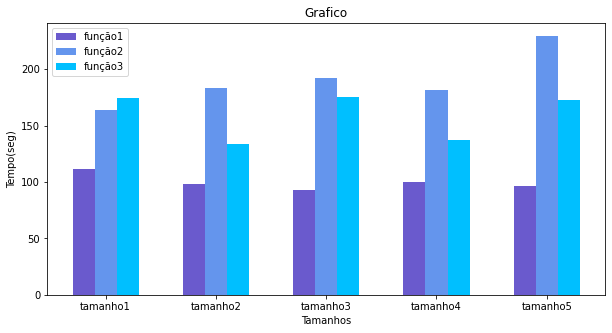

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



#tempo de execução 
funçao1 = [tempo11,tempo21,tempo31,tempo41,tempo51]
funçao2 = [tempo12,tempo22,tempo32,tempo42,tempo52]
funçao3 = [tempo13,tempo23,tempo33,tempo43,tempo53]

barWidth = 0.2

plt.figure(figsize=(10,5))

r1 = np.arange(len(funçao1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1,funçao1,color = "#6A5ACD",width = barWidth,label="função1")
plt.bar(r2,funçao2,color = "#6495ED",width = barWidth,label="função2")
plt.bar(r3,funçao3,color = "#00BFFF",width = barWidth,label="função3")

plt.xlabel("Tamanhos")
plt.xticks([r + barWidth for r in range(len(funçao1))],["tamanho1","tamanho2","tamanho3","tamanho4","tamanho5"])
plt.ylabel("Tempo(seg)")
plt.title("Grafico")

plt.legend()
plt.show()


#Gráfico tempo de busca titulos e sentenças

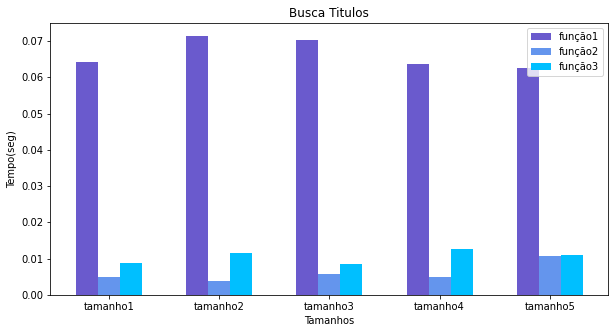

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



#tempo de execução 
funçao1 = [titulobusca11, titulobusca21, titulobusca31, titulobusca41, titulobusca51]
funçao2 = [titulobusca12, titulobusca22, titulobusca32, titulobusca42, titulobusca52]
funçao3 = [titulobusca13, titulobusca23, titulobusca33, titulobusca43, titulobusca53]

barWidth = 0.2

plt.figure(figsize=(10,5))

r1 = np.arange(len(funçao1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1,funçao1,color = "#6A5ACD",width = barWidth,label="função1")
plt.bar(r2,funçao2,color = "#6495ED",width = barWidth,label="função2")
plt.bar(r3,funçao3,color = "#00BFFF",width = barWidth,label="função3")

plt.xlabel("Tamanhos")
plt.xticks([r + barWidth for r in range(len(funçao1))],["tamanho1","tamanho2","tamanho3","tamanho4","tamanho5"])
plt.ylabel("Tempo(seg)")
plt.title("Busca Titulos")

plt.legend()
plt.show()


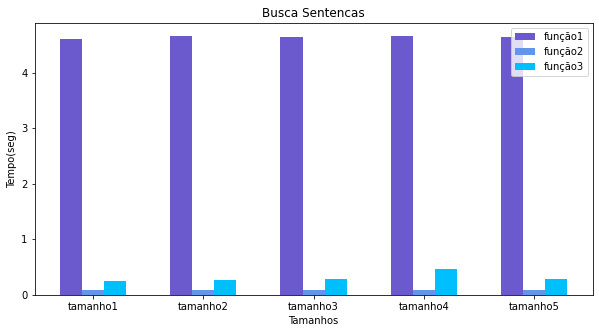

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



#tempo de execução 
funçao1 = [sentencabusca11, sentencabusca21, sentencabusca31, sentencabusca41, sentencabusca51]
funçao2 = [sentencabusca12, sentencabusca22, sentencabusca32, sentencabusca42, sentencabusca52]
funçao3 = [sentencabusca13, sentencabusca23, sentencabusca33, sentencabusca43, sentencabusca53]

barWidth = 0.2

plt.figure(figsize=(10,5))

r1 = np.arange(len(funçao1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1,funçao1,color = "#6A5ACD",width = barWidth,label="função1")
plt.bar(r2,funçao2,color = "#6495ED",width = barWidth,label="função2")
plt.bar(r3,funçao3,color = "#00BFFF",width = barWidth,label="função3")

plt.xlabel("Tamanhos")
plt.xticks([r + barWidth for r in range(len(funçao1))],["tamanho1","tamanho2","tamanho3","tamanho4","tamanho5"])
plt.ylabel("Tempo(seg)")
plt.title("Busca Sentencas")

plt.legend()
plt.show()
